In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat

import IfA_Smeargle as ifa

In [2]:
fits,header,data = ifa.meta.smeargle_open_fits_file("190510_T40K_2hrdark_2.5VdetBias_up_16avg_GN_CDS_ADU_per_ksec.fits")

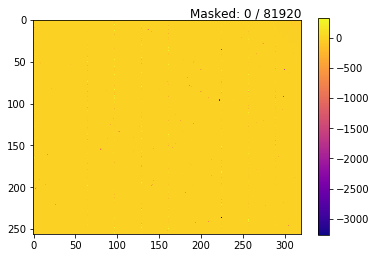

In [3]:
fig, ax = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(data,figure_axes=ax)

#plt.imshow(data, cmap='hot')
#plt.colorbar()
#plt.show()

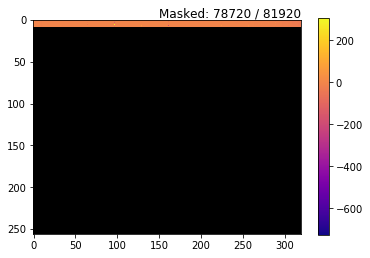

In [4]:
mask = np.full_like(data,False)
mask[10:,:] = True
masking_data = np_ma.array(data,mask=mask)

ifa.hotel.plot_array_heatmap_image(masking_data)

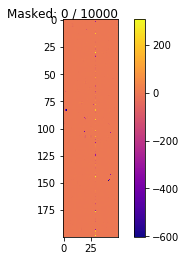

In [5]:
y_bounds = [50,250]
x_bounds = [100,150]

sub_data = ifa.meta.smeargle_extract_subarray(data,x_bounds,y_bounds)

fig2, ax2 = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=ax2)

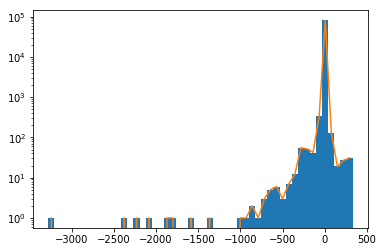

In [6]:
hist_data = plt.hist(data.flatten(),bins=50,range=None,log=8)

# Define the x-axis values, that is, the center of each bar.
hist_x = (hist_data[1][0:-1] + hist_data[1][1:])/2
hist_y = hist_data[0]
plt.plot(hist_x,hist_y)

plt.show()

{'mean': 2.202705971716723, 'stddev': 20.8864667166345, 'amplitude': 81925.01349088392, 'max': 81628.74473873244}


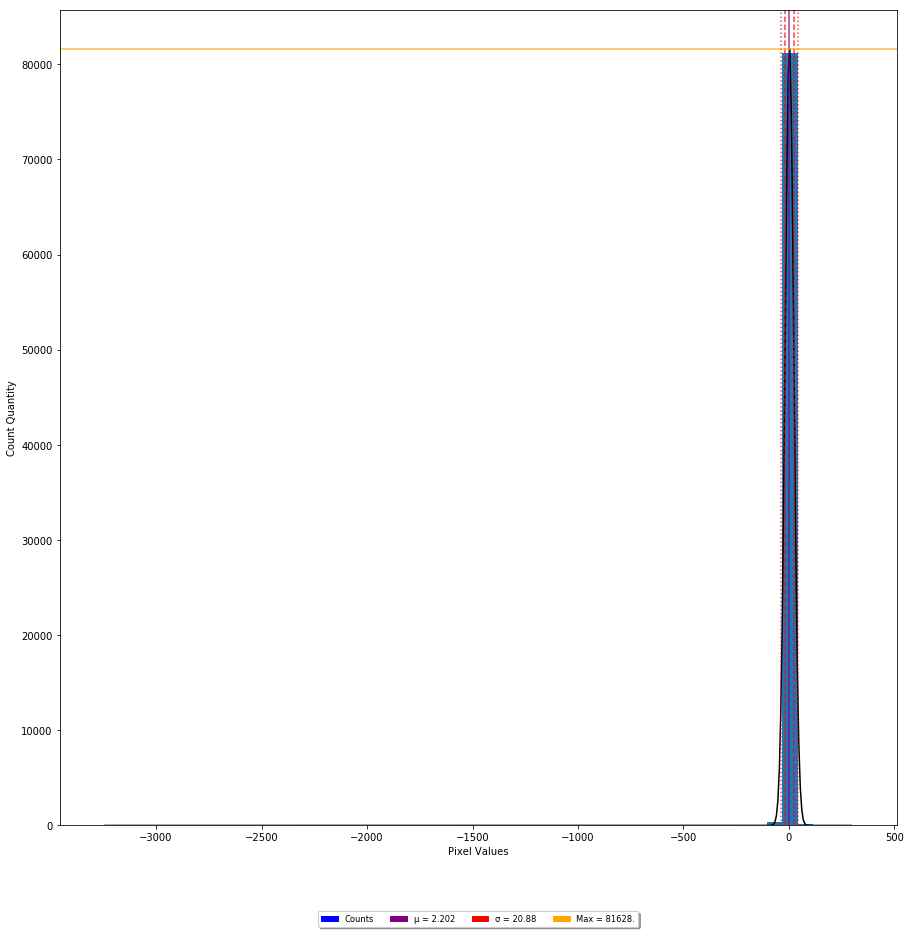

In [7]:
fig2, ax2 = plt.subplots(1, 1,figsize=(15,15))
ax2 = ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=ax2,
                                    histogram_plot_paramters={'bins':50, 'range':None,'log':False})[1]
print(ax2)

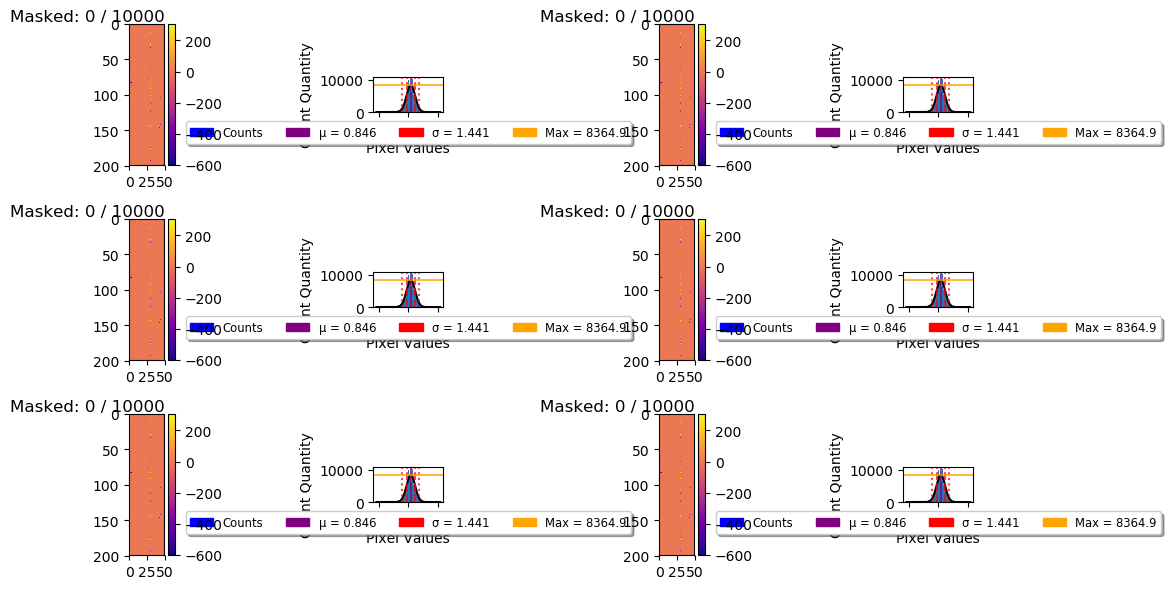

In [8]:
fig3, ax3 = plt.subplots(3, 4,figsize=(10,6),dpi=100)

ax3[:,0]

# y , x
for axesdex in ax3[:,0]:
    ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=axesdex)
for axesdex in ax3[:,2]:
    ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=axesdex)
    
# Hist
for axesdex in ax3[:,1]:
    ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 2))
for axesdex in ax3[:,3]:
    ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 2))
    
fig3.tight_layout()
fig3.subplots_adjust(right=0.9)
plt.show(fig3)


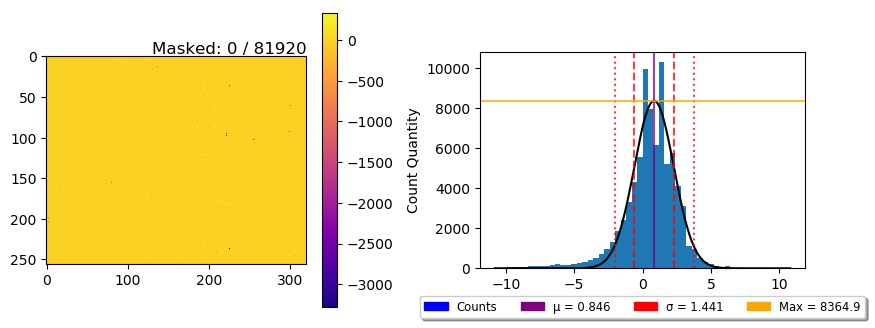

In [13]:
#fig4, ax4 = plt.subplots(1, 2,figsize=(9,3.5),dpi=100)

figure = ifa.hotel.plot_single_heatmap_and_histogram(data)
    
plt.show(figure)

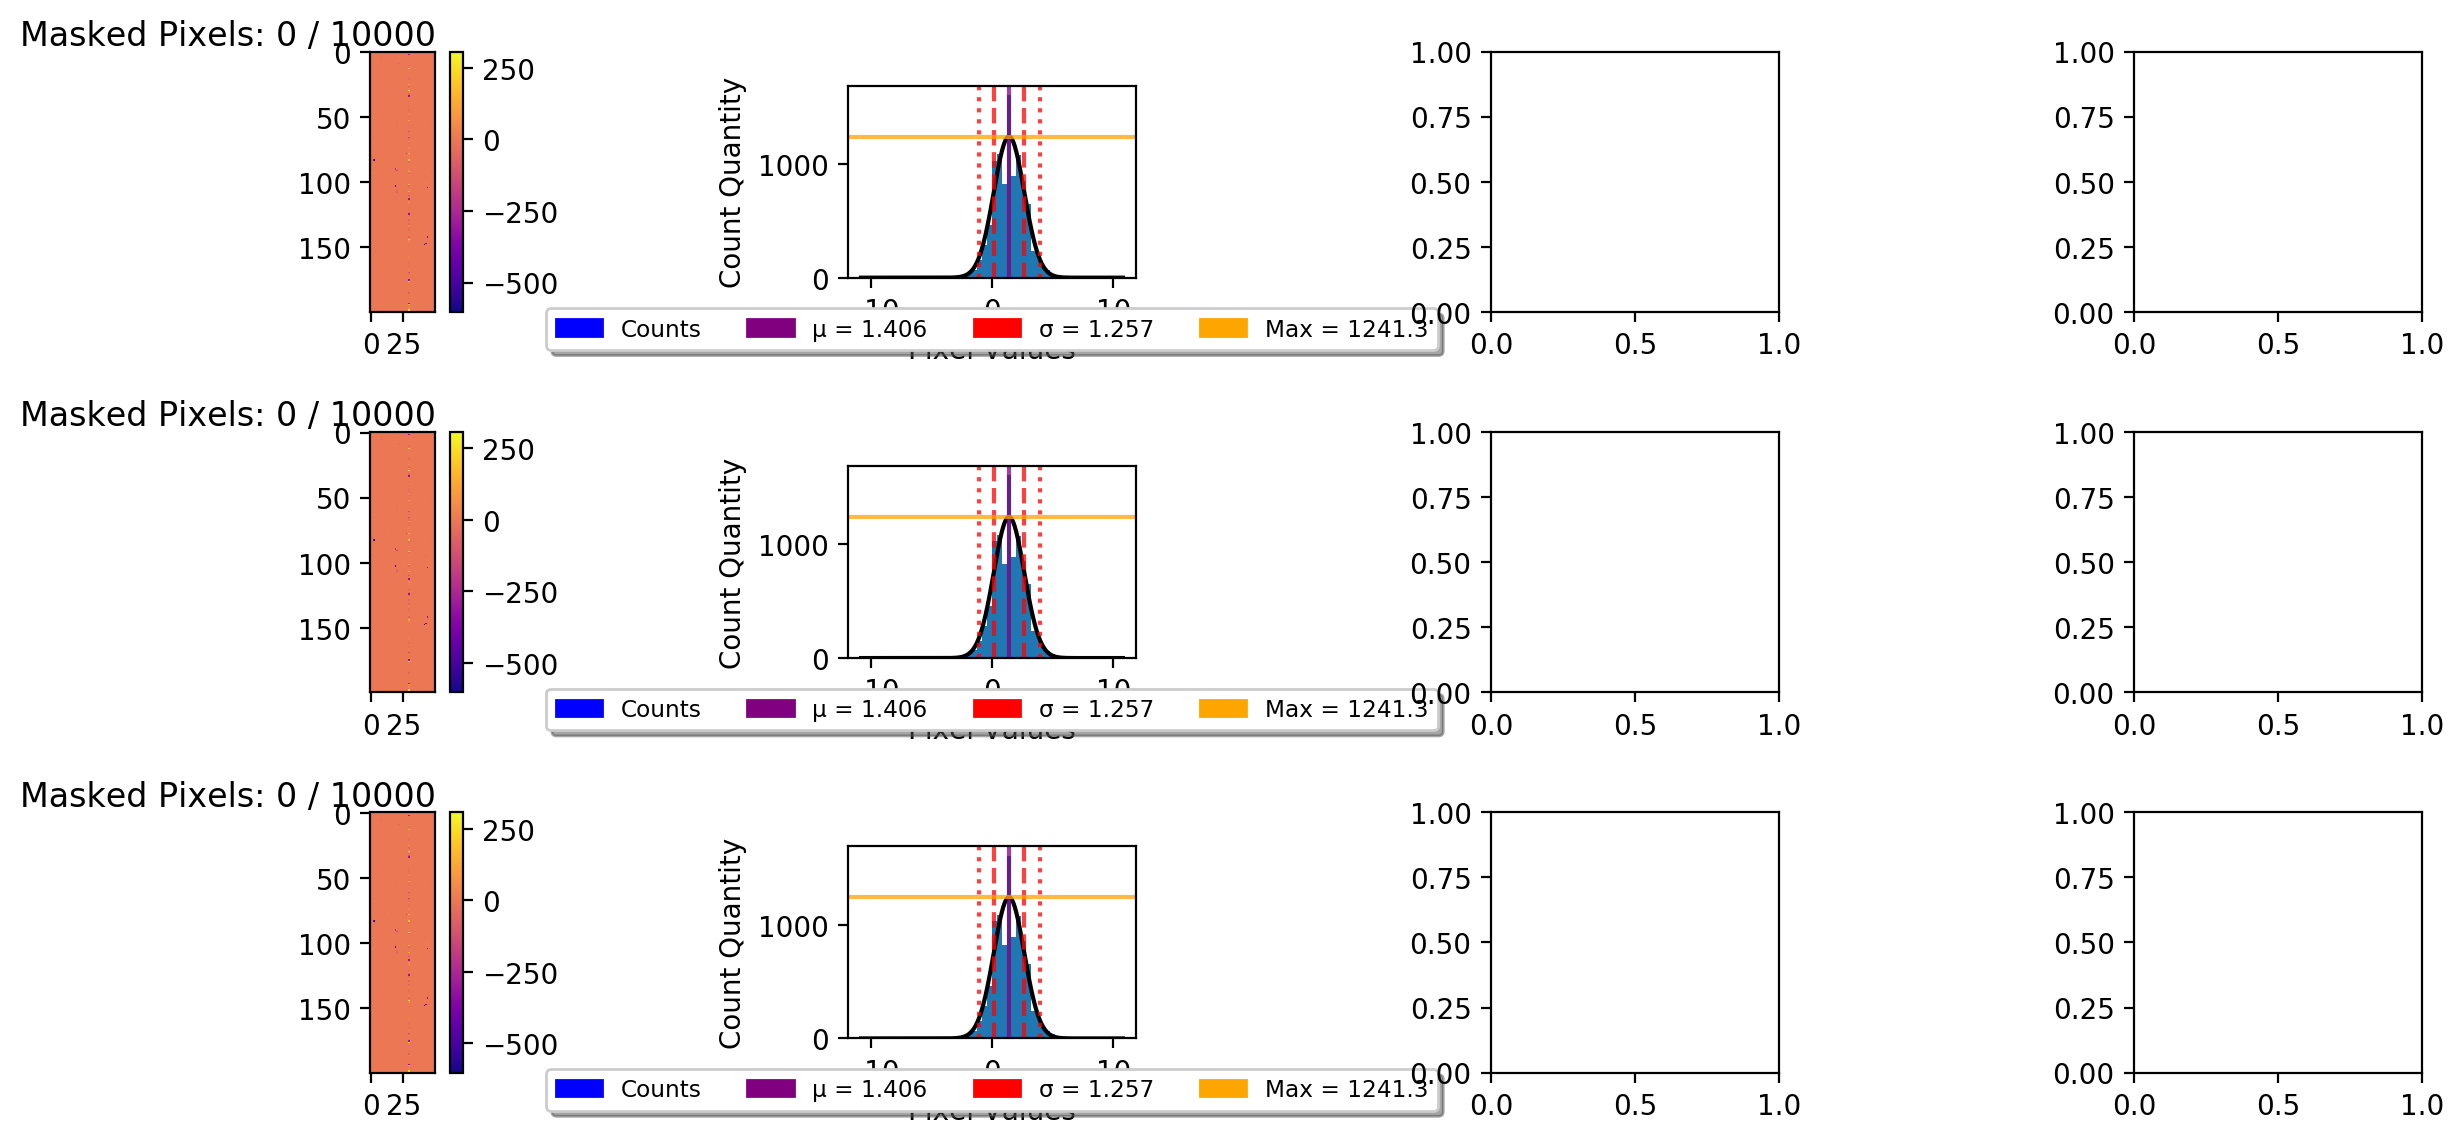

In [7]:
fig5, ax5 = plt.subplots(3, 4,figsize=(12,6),dpi=200)

temp_data = sub_data

def double_axes(temp_data,axes_1,axes_2):
    ifa.hotel.plot_array_heatmap_image(temp_data,figure_axes=axes_1)

    ifa.hotel.plot_array_histogram(temp_data.flatten(),figure_axes=axes_2)
    axes_2.set_aspect(1/(axes_2.get_data_ratio() * 1.5))
    #print(axes_2.get_data_ratio())

    
for axes1dex,axes2dex in zip(ax5[:,0],ax5[:,1]):
    double_axes(temp_data,axes1dex,axes2dex)
    

#for axes1dex,axes2dex in zip(ax5[:,2],ax5[:,3]):
#    double_axes(temp_data,axes1dex,axes2dex)
    
    
fig5.tight_layout()
plt.show(fig5)

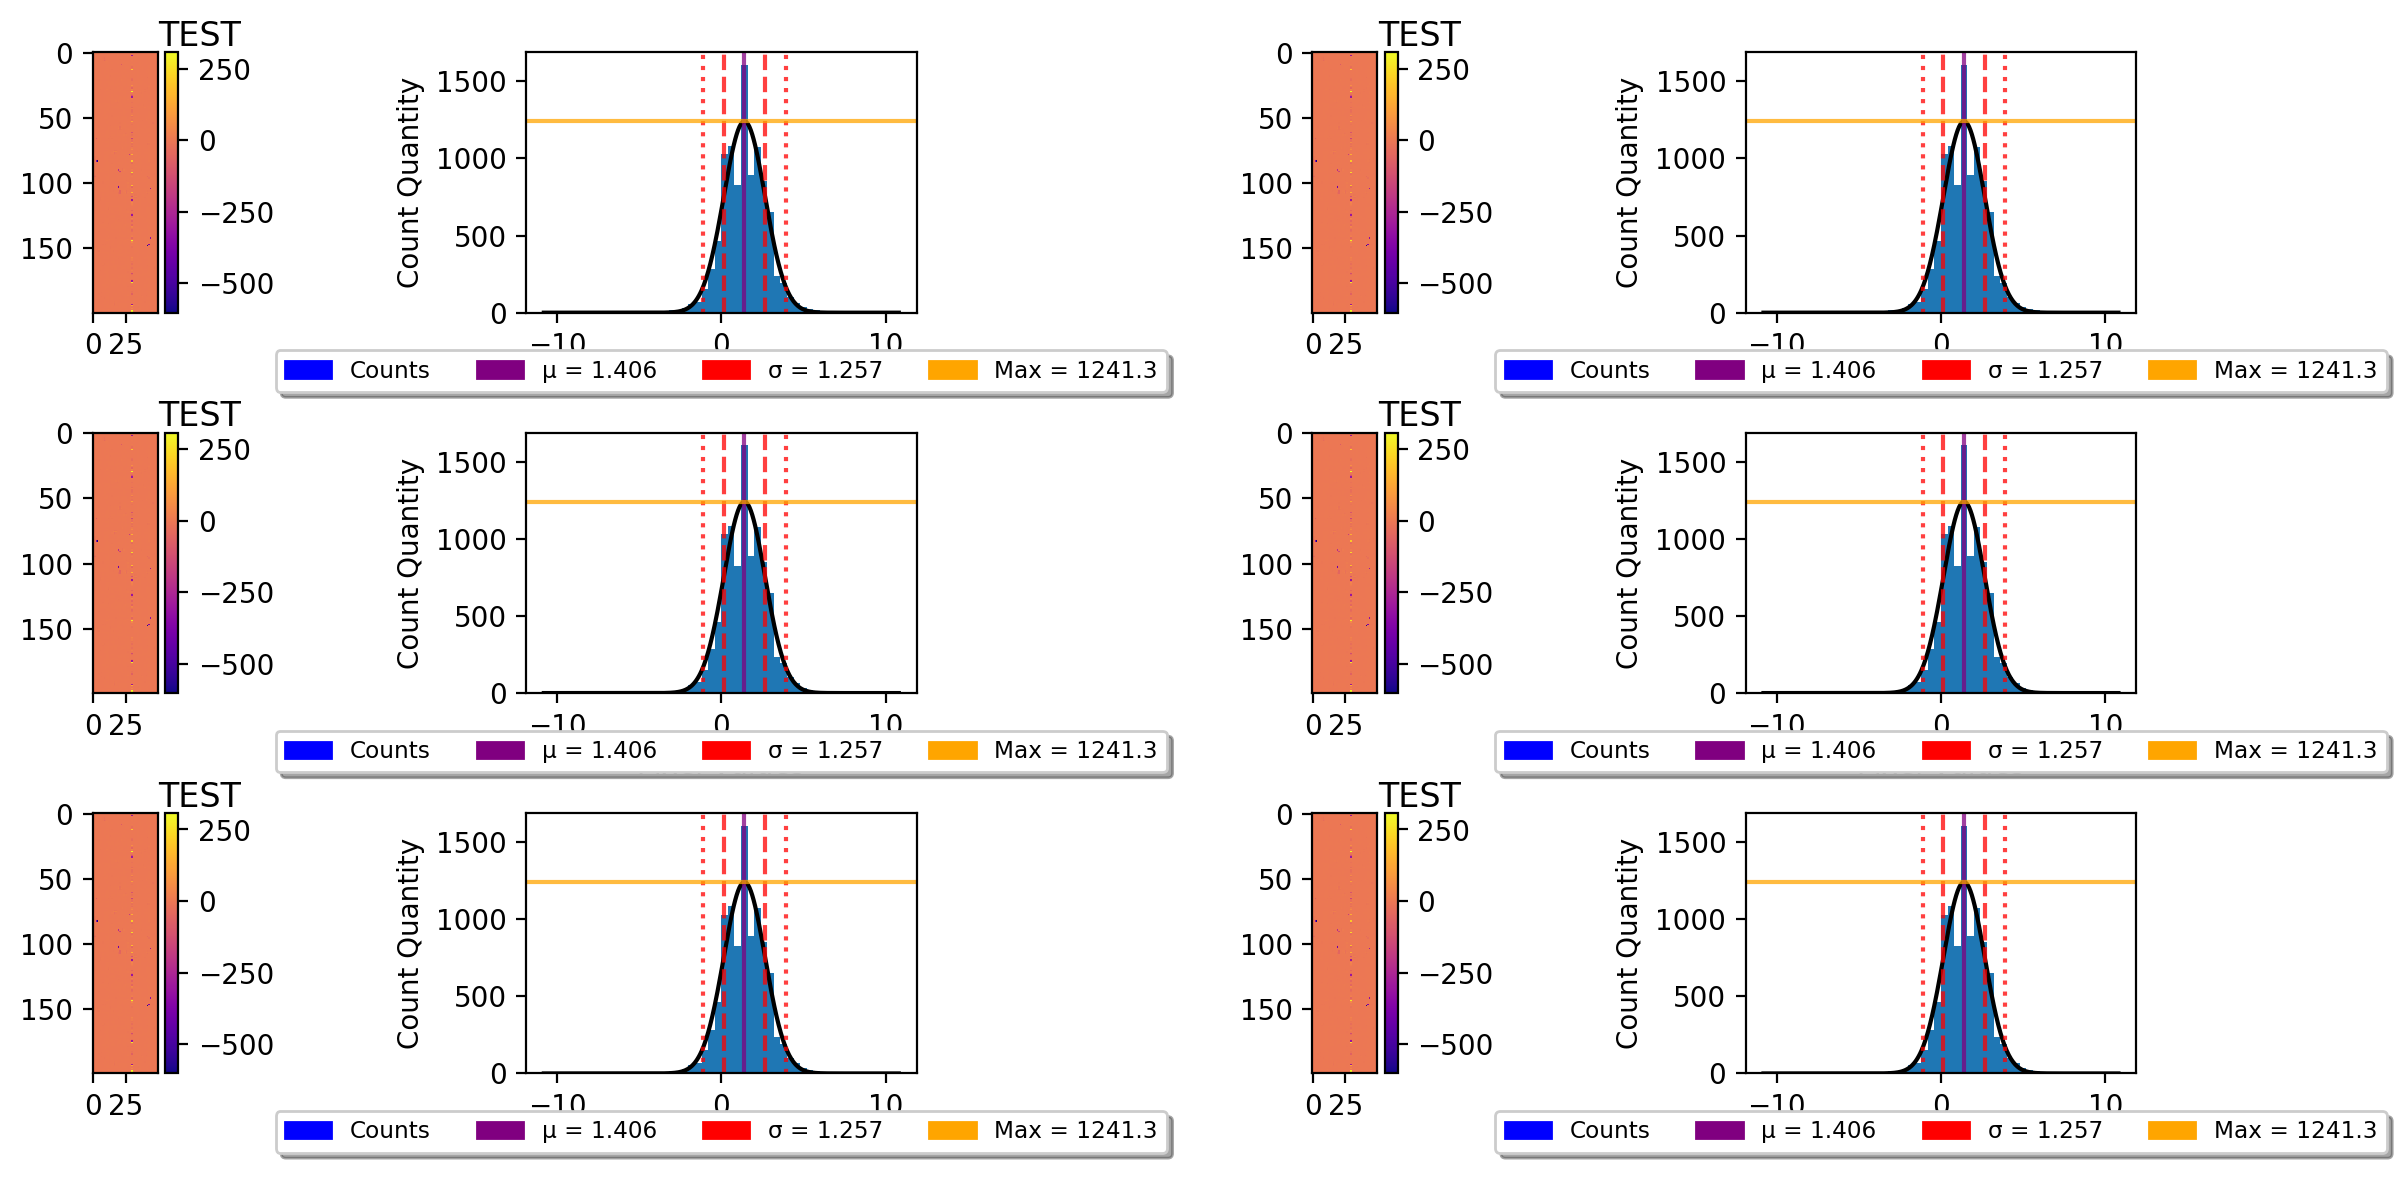

In [11]:
fig6, ax6 = plt.subplots(3, 6,figsize=(12,6),dpi=200)

ax6[0,0] = plt.subplot2grid((3, 6), (0, 0))
ax6[0,1] = plt.subplot2grid((3, 6), (0, 1), colspan=2)
ax6[1,0] = plt.subplot2grid((3, 6), (1, 0))
ax6[1,1] = plt.subplot2grid((3, 6), (1, 1), colspan=2)
ax6[2,0] = plt.subplot2grid((3, 6), (2, 0))
ax6[2,1] = plt.subplot2grid((3, 6), (2, 1), colspan=2)

ax6[0,3] = plt.subplot2grid((3, 6), (0, 3))
ax6[0,4] = plt.subplot2grid((3, 6), (0, 4), colspan=2)
ax6[1,3] = plt.subplot2grid((3, 6), (1, 3))
ax6[1,4] = plt.subplot2grid((3, 6), (1, 4), colspan=2)
ax6[2,3] = plt.subplot2grid((3, 6), (2, 3))
ax6[2,4] = plt.subplot2grid((3, 6), (2, 4), colspan=2)

#print(ax6)

lol_data = sub_data
# y , x
for axesdex in ax6[:,0]:
    ifa.hotel.plot_array_heatmap_image(lol_data,figure_axes=axesdex)
for axesdex in ax6[:,3]:
    ifa.hotel.plot_array_heatmap_image(lol_data,figure_axes=axesdex)
    
# Hist
for axesdex in ax6[:,1]:
    ifa.hotel.plot_array_histogram(lol_data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 1.5))
for axesdex in ax6[:,4]:
    ifa.hotel.plot_array_histogram(lol_data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 1.5))
    
fig6.tight_layout()
plt.show(fig6)

In [12]:
?ax.text